# Problem 1: Rapid Data Visualization and Prototyping

Work Procedure:
1. Data Preprocessing with Python.
2. Null Value handling
3. Data Format change where necessary
4. Import clean_listings.csv into Tableau
5. Using different techniques to analyze data and trying to answer the questions

## Problem 1a

As there were no income provided in the datasets, we tried to calculate an approximate income from provided prices and expenses. We then divided the income into three groups: Basic, Moderate and Overachiever. Then we tried to visualize these data against different host locations and tried to find out different locations income segment. It helps us to understand which locations are more profitable compare to others.
Then in the second visualization of the dashboard, availability of location on a particular was shown with boolean operator and two different color.



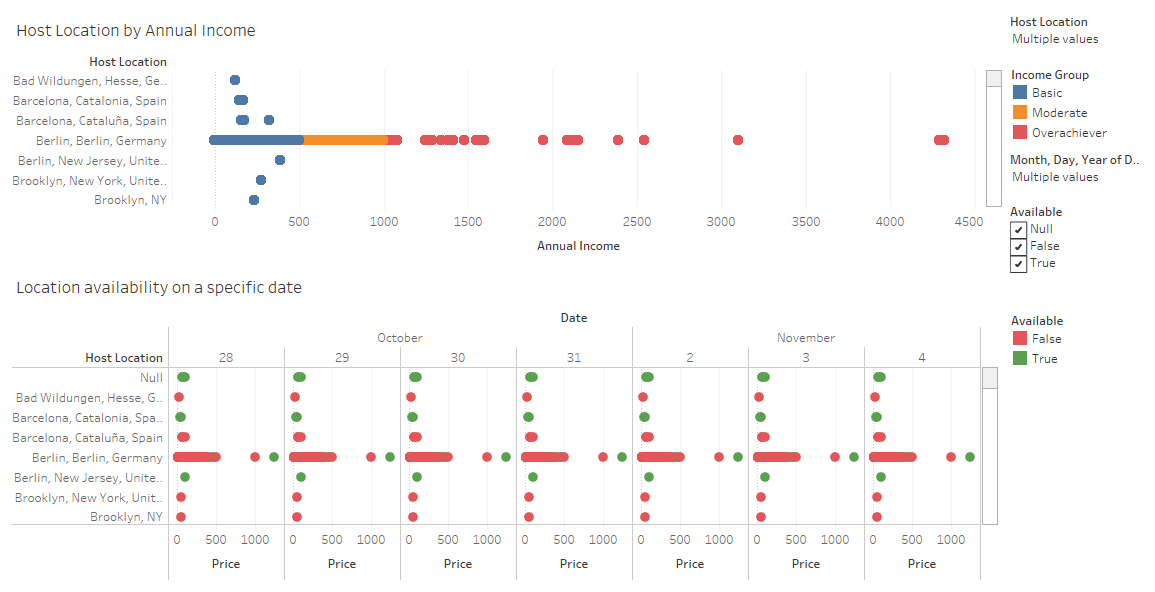

From the first visualization named host location by annual income we can summarize, high income segment that means overachievers contribute to the most of the Berlin Airbnb income. Other locations earn mostly from their basci income segment.

From the second visualization, a customer can find out if a location is available on a given price during a particular day. 
We can identify from the image most of the low price point locations has been booked already in the case of Berlin and some other locations. However, some locations are still available in japan, Spain, Italy and other parts of the world. It is very much obvious that low priced locations are popular among people as very few can afford high priced expensive ones.




## Problem 1b

In this problem, pricing and seasonality has to be addressed. So we joined listings file with calender file in order to get the time series values. We plot a line graph with price and months. A line graph appears which shows peaks and valleys. That means seasonality exists.

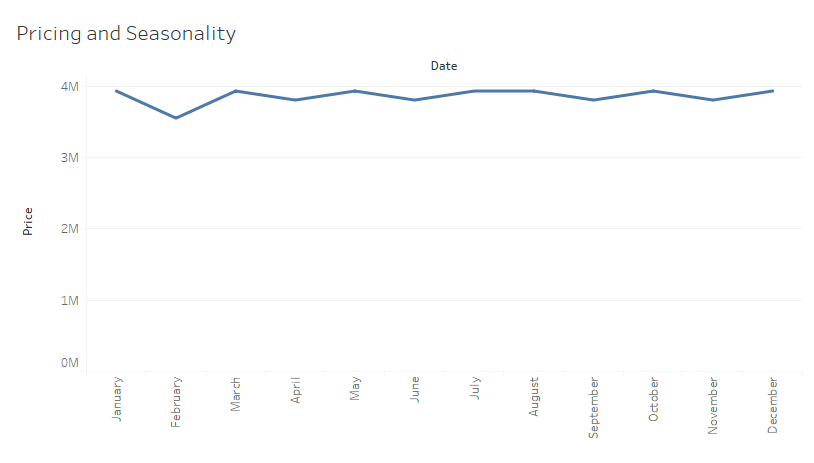

From the graph we can determine that prices drops and peaks in almost every alternate month except in the month of July and August when it is remain same. Due to summer time, a huge number of people go out on vacation that time which may be the reason of stable price. 

## Problem 1c

In this huge listings dataset, some data combination are anomalous and can guide us in wrong direction if not properly understood. We have number of columns related to reviews consist of average review count, review accuracy, review cleanliness etc. When we try to use these columns against any meaningful categorical data we can identify the irregularities. In this case, we have used these columns in different visualization against our own created categorical column Income Groups where different groups of hosts shown based on their income. 

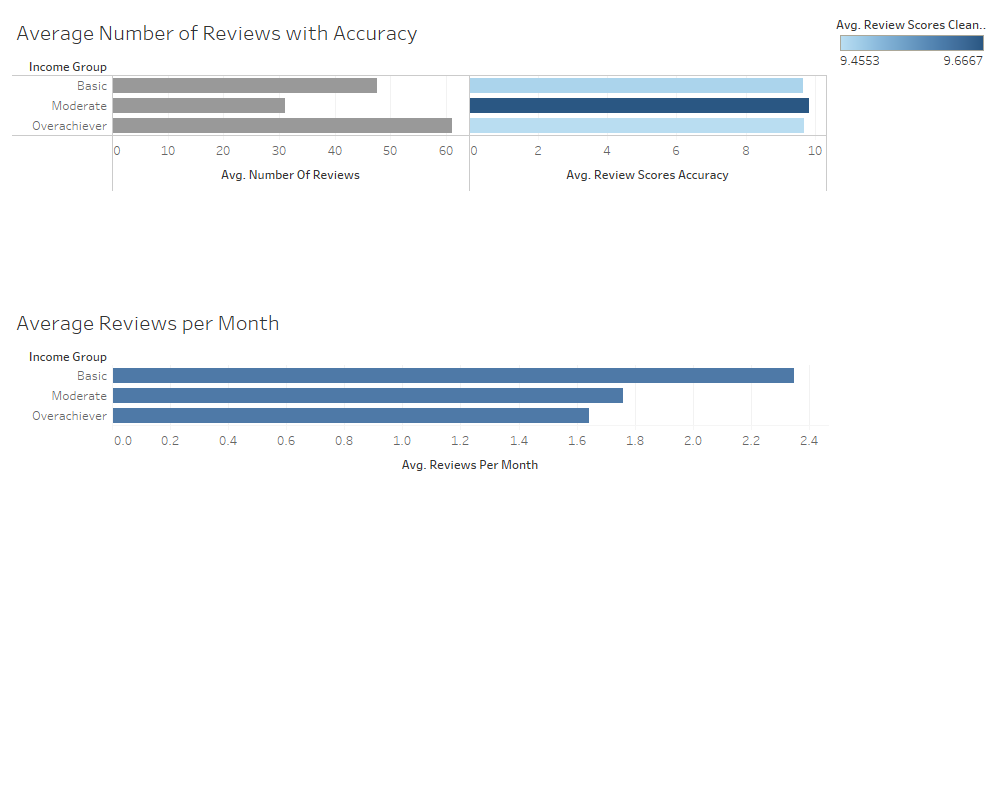

## Problem 2

In first visualization we can see the overachiever group leading the way in case of average number of reviews and in case of cleanliness, moderate group is leading the way. However, in second visualization of the dashboard, we can see a different situation where we have use "Average Reviews per Month" was used. Here, the basic group (where host earn least amount of money between three) generates highest reviews per month.

This indicates there are existence of inconsistency in some parts of this dataset which can lead us to wrong decision making if not properly taken care of.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [3]:
# Import clean data 
path = 'E:\Sheba XYZ\Berlin Airbnb Dataset-20190801T120041Z-001\Berlin Airbnb Dataset\cleaned_rank.csv'

x = pd.read_csv(path)
df = pd.DataFrame(data=x)

X = df.drop("price",1)   #Feature Matrix
y = df["price"]          #Target Variable
df.head()

,Unnamed: 0,Unnamed: 0.1,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,0,2015,4,4,3,1.0,1.0,2,0,...,118,93,10,9,10,10,10,9,4,3.76
1,1,1,3176,1,1,4,1.0,1.0,2,720,...,143,92,9,9,9,9,10,9,1,1.25
2,2,2,7071,1,1,2,1.0,1.0,2,0,...,197,96,10,10,10,10,10,9,1,1.75
3,3,3,20858,1,1,4,1.0,2.0,2,0,...,56,87,9,9,9,8,10,9,1,0.75
4,4,4,22415,2,2,4,1.0,2.0,2,0,...,61,94,10,9,10,10,10,9,2,0.59


### We have selected "Price" as a performance metric because it is one of the most important attribute of the dataset can give us insights about pricing in different season and different demand-supply situation. It can also help us predicting the future pricing of the locations.  So we will use price as a performance metric design the a listing ranking system with some other attribute highly correlated with price so that it can provide a comparative holistic view to the users seeking airbnb services. We have used both correlation and Recursive Feature Elimination (RFE) method in order to design this listing ranking system. RFE is the more accurate system because it is an iterative process. However, this method is computationally expensive and time consuming suited when we have lesser features (~20).

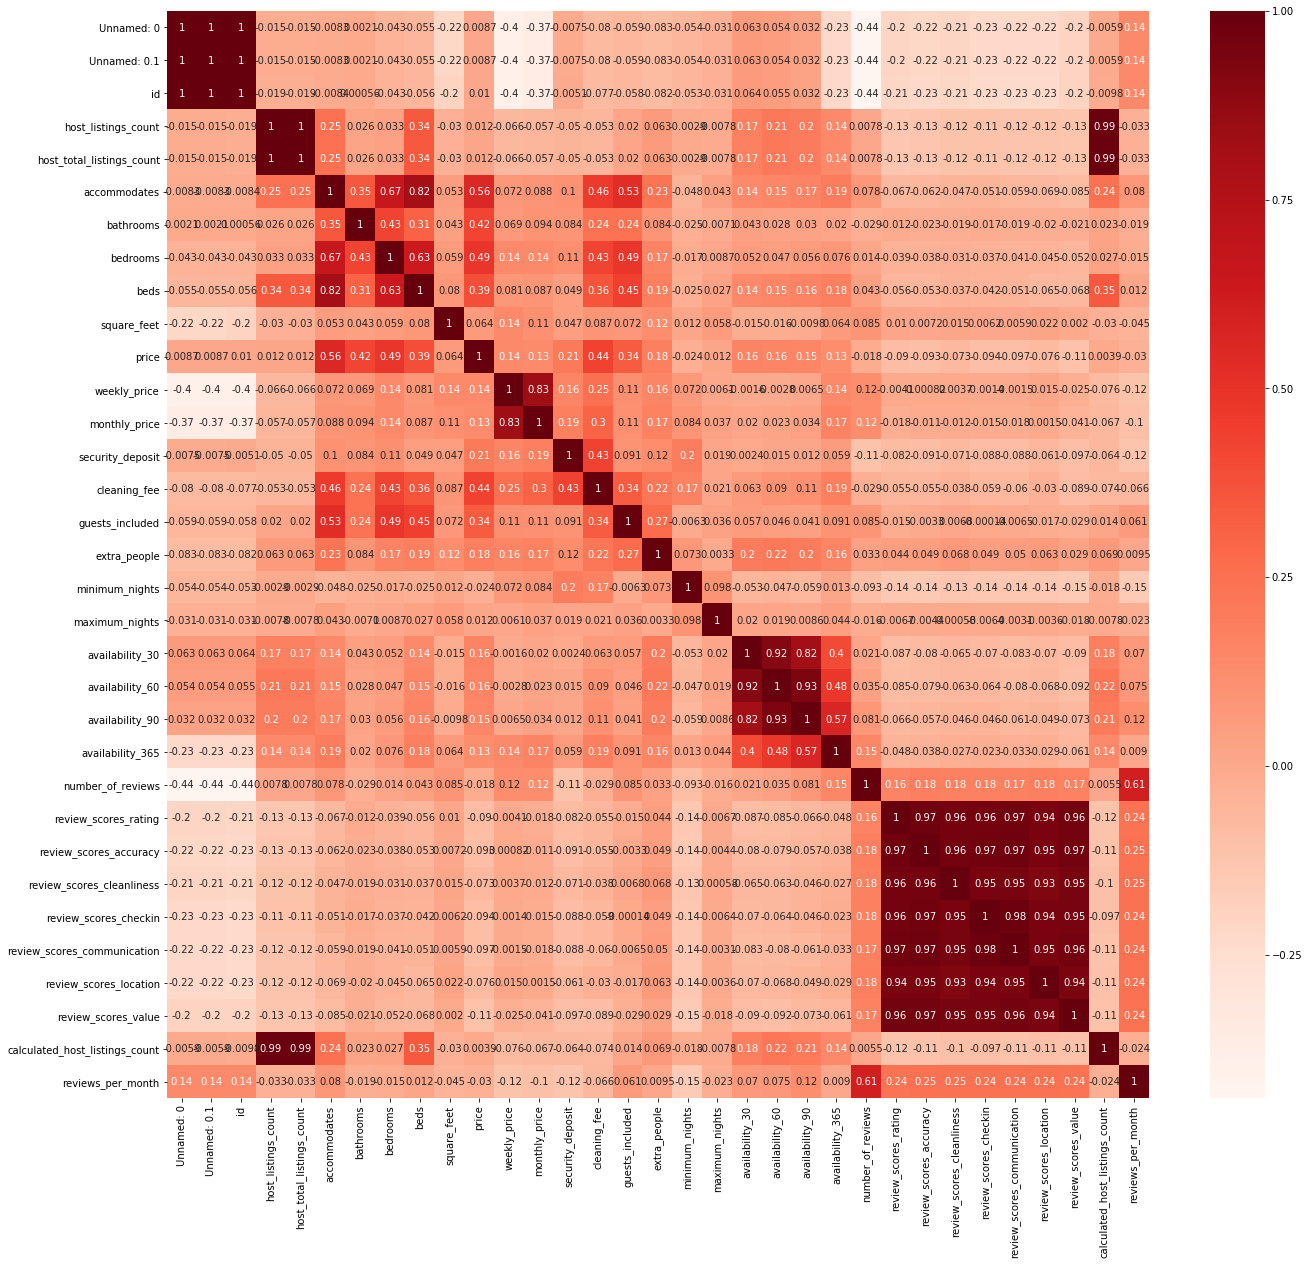

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(22,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

accommodates    0.56033
price           1.00000
Name: price, dtype: float64

#### Recursive Feature Elimination (RFE) is a method works by recursively removing attributes and building models with remaining attributes. It uses accuracy metric to rank the feature according to their importance. The method takes the whole model tobe used and number of its required features as input. It then gives the ranking of all the variables, 1 being most important. Besides, it also gives its support, True being relevant feature and False being irrelevant feature.

In [6]:
model = LinearRegression()
 #Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
    

[False False False False False  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False  True  True  True False False]
[24 23 26 10  8  1  1  1  1 18 20 22 17  7 13 14 11 25  6 15 16 21 19 12
  9  2  3  1  1  1  5  4]


In [9]:
#no of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.317310


In [8]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


## Problem 3a: London, United Kingdom vs Paris, France Comparison

In [380]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns 


In [381]:
df = pd.read_csv("E:\Sheba XYZ\Comparative Market Analysis Dataset-20190801T120513Z-001\Comparative Market Analysis Dataset\cleaned_london.csv",header = 0)
df.head()

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month
0,1.00,3.0,3.0,51.46225,-0.11732,4,1.0,1.0,3.0,88,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,2,2,1.63
1,0.90,4.0,4.0,51.56802,-0.11121,2,1.0,1.0,0.0,65,...,96.0,9.0,10.0,9.0,10.0,9.0,9.0,3,1,0.14
2,1.00,1.0,1.0,51.48796,-0.16898,2,1.0,1.0,1.0,100,...,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,0.74
3,0.74,17.0,17.0,51.52098,-0.14002,6,2.0,3.0,3.0,300,...,93.0,10.0,9.0,9.0,9.0,10.0,9.0,14,14,0.40
4,1.00,2.0,2.0,51.47298,-0.16376,2,1.5,1.0,1.0,175,...,98.0,10.0,10.0,10.0,10.0,9.0,9.0,1,1,0.88


## Data Cleaning

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60504 entries, 0 to 60503
Data columns (total 34 columns):
host_since                                     60482 non-null float64
host_listings_count                            60482 non-null float64
host_total_listings_count                      60482 non-null float64
accommodates                                   60504 non-null int64
bathrooms                                      60504 non-null float64
bedrooms                                       60504 non-null float64
beds                                           60045 non-null float64
price                                          60504 non-null int64
weekly_price                                   60504 non-null float64
monthly_price                                  60504 non-null float64
security_deposit                               60504 non-null float64
cleaning_fee                                   60504 non-null float64
guests_included                                60504 no

In [382]:
df['review_scores_accuracy'].replace(np.nan, 0, inplace=True)
df['reviews_per_month'].replace(np.nan, 0, inplace=True)
df['review_scores_rating'].replace(np.nan, 0, inplace=True)
df['review_scores_cleanliness'].replace(np.nan, 0, inplace=True)
df['review_scores_checkin'].replace(np.nan, 0, inplace=True)
#df['host_response_rate'].replace(np.nan,0)

In [245]:
avg_bedrooms = df["bedrooms"].astype("float").mean(axis=0)
print("Average bedrooms:", avg_bedrooms)

Average bedrooms: 1.0980878655551138


In [246]:
df["bedrooms"].replace(np.nan, avg_bedrooms, inplace=True)

In [247]:
avg_bathrooms = df["bathrooms"].astype("float").mean(axis=0)
print("Average bathrooms:", avg_bathrooms)

Average bathrooms: 1.121284057635362


In [248]:
df["bathrooms"].replace(np.nan, avg_bathrooms, inplace=True)

In [249]:
avg_price = df["price"].astype("float").mean(axis=0)
print("Average price:", avg_price)

Average price: 117.13711490149412


In [383]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [384]:
df['weekly_price'].replace(np.nan, 0, inplace=True)
df['monthly_price'].replace(np.nan, 0, inplace=True)
df['security_deposit'].replace(np.nan, 0, inplace=True)
df['cleaning_fee'].replace(np.nan, 0, inplace=True)


In [386]:
df_features = df[df.columns[1:30]]
y =   df[df.columns[9]]
df_features.describe()
print(y)

0         88
1         65
2        100
3        300
4        175
5         65
6         29
7        147
8         75
9         34
10       100
11        45
12       195
13        72
14        80
15        70
16        65
17        79
18        62
19       296
20        25
21        45
22        29
23        29
24        25
25       105
26        60
27        35
28        60
29        45
        ... 
81999     79
82000    189
82001     18
82002     45
82003    130
82004     38
82005     60
82006     90
82007    100
82008     35
82009    120
82010     65
82011    129
82012     39
82013    110
82014     23
82015    160
82016     90
82017     99
82018     99
82019     50
82020    190
82021     52
82022     50
82023     79
82024    127
82025    594
82026     30
82027    140
82028     55
Name: price, Length: 82029, dtype: int64


In [388]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_features.values)
df_features_scaled = pd.DataFrame(scaled_features, index=df_features.index, columns=df_features.columns)

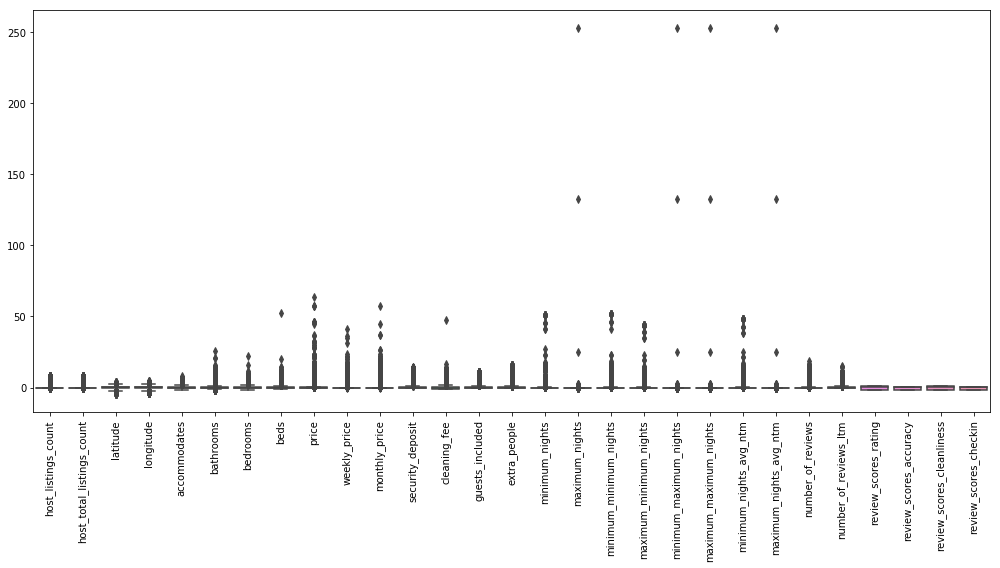

In [389]:
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_scaled )
plt.xticks(rotation=90)  

plt.tight_layout()

#### From the boxplot we can see a huge number of data is far out from mean and these outliers can affect the result significantly. In order to achieve a better result, we should consider a dataset with more closer to mean.

(81657, 29)


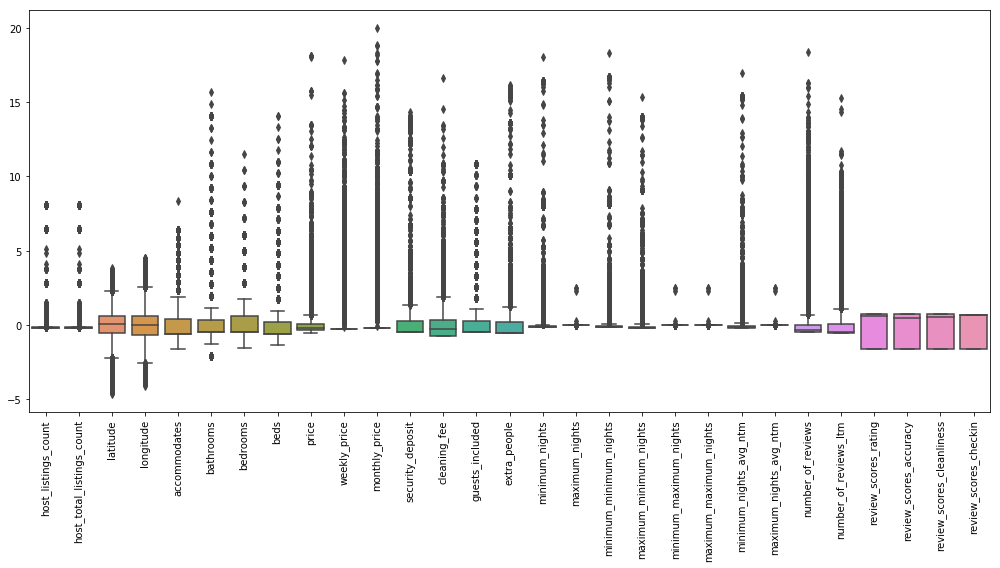

In [390]:
df_features_clean=df_features_scaled[df_features_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 20).all(axis=1)]
print(df_features_clean.shape)
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_clean )
plt.xticks(rotation=90)  
plt.tight_layout()

The following script divides data into attributes and labels:

In [391]:
#############################
df_features_y_clean = pd.concat([df_features_clean, y], axis=1, join_axes=[df_features_clean.index])
#################################
df_features_clean = df_features_y_clean.iloc[:,0:28]
df_y = df_features_y_clean.iloc[:,28]



Dividing the data into training and testing set

In [392]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features_clean, df_y, test_size=0.2, random_state=0)

In [393]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Algorithm
After scaling, it's time to train our random forest algorithm to solve this regression problem.

In [394]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Evaluating the algorithm
The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error.

In [395]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06321182110969688
Mean Squared Error: 0.020831483112490962
Root Mean Squared Error: 0.14433115780208708


# Paris Dataset

In [293]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# keeps the plots in one place. calls image as static pngs
%matplotlib inline 

import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns


In [294]:
df1 = pd.read_csv("E:\Sheba XYZ\Comparative Market Analysis Dataset-20190801T120513Z-001\Comparative Market Analysis Dataset\Clean_Paris.csv",header = 0)
df1.head()

,host_since,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month
0,39735.0,1.0,1.0,2,1.0,0.0,0.0,75,490.0,NaN,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0.27
1,39858.0,1.0,1.0,2,1.0,0.0,1.0,115,600.0,2000.0,...,91.0,9.0,8.0,9.0,9.0,10.0,9.0,1,1,1.44
2,39690.0,2.0,2.0,4,1.0,2.0,2.0,115,NaN,2200.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,1,2.47
3,40007.0,1.0,1.0,3,1.0,1.0,1.0,90,600.0,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0.01
4,40023.0,3.0,3.0,2,1.0,1.0,1.0,75,NaN,1480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN


In [304]:
np.where(df1.values >= np.finfo(np.float64).max)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


(array([], dtype=int64), array([], dtype=int64))

In [305]:
np.isnan(df1.values.any())

False

In [306]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60504 entries, 0 to 60503
Data columns (total 34 columns):
host_since                                     60482 non-null float64
host_listings_count                            60482 non-null float64
host_total_listings_count                      60482 non-null float64
accommodates                                   60504 non-null int64
bathrooms                                      60504 non-null float64
bedrooms                                       60504 non-null float64
beds                                           60045 non-null float64
price                                          60504 non-null int64
weekly_price                                   10384 non-null float64
monthly_price                                  6597 non-null float64
security_deposit                               42108 non-null float64
cleaning_fee                                   44523 non-null float64
guests_included                                60504 non

In [307]:
df1['review_scores_accuracy'].replace(np.nan, 0, inplace=True)
#df['reviews_per_month'].replace(np.nan, 0, inplace=True)
#df['review_scores_rating'].replace(np.nan, 0, inplace=True)
df1['review_scores_cleanliness'].replace(np.nan, 0, inplace=True)
df1['review_scores_checkin'].replace(np.nan, 0, inplace=True)
#df['host_response_rate'].replace(np.nan,0)

In [308]:
# simply drop whole row with NaN in "price" column
df1.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df1.reset_index(drop=True, inplace=True)

In [309]:
df1.dropna()
df1.reset_index(drop=True, inplace=True)

In [195]:
df1.to_csv('cleaned_paris_1.csv')

In [310]:
df1['weekly_price'].replace(np.nan, 0, inplace=True)
df1['monthly_price'].replace(np.nan, 0, inplace=True)
df1['security_deposit'].replace(np.nan, 0, inplace=True)
df1['cleaning_fee'].replace(np.nan, 0, inplace=True)

In [311]:
df1_features = df1[df1.columns[1:30]]
y =   df1[df1.columns[7]]
df1_features.describe()
print(y)

0         75
1        115
2        115
3         90
4         75
5         80
6         75
7        157
8        100
9         70
10       110
11        79
12       100
13       110
14        75
15        90
16        55
17        78
18       120
19       105
20        80
21       110
22        65
23       250
24        97
25        49
26        80
27        98
28       145
29       120
        ... 
60474     48
60475     40
60476     46
60477    117
60478     26
60479    250
60480    240
60481     26
60482    120
60483     80
60484    400
60485     65
60486    140
60487    169
60488     65
60489     60
60490    100
60491     60
60492    125
60493     80
60494    145
60495    140
60496    250
60497     65
60498     66
60499     80
60500     55
60501     55
60502     60
60503     80
Name: price, Length: 60504, dtype: int64


In [314]:
scaler = StandardScaler()
scaled_features1 =scaler.fit_transform(df1_features.values)
df1_features_scaled = pd.DataFrame(scaled_features1, index=df1_features.index, columns=df1_features.columns)

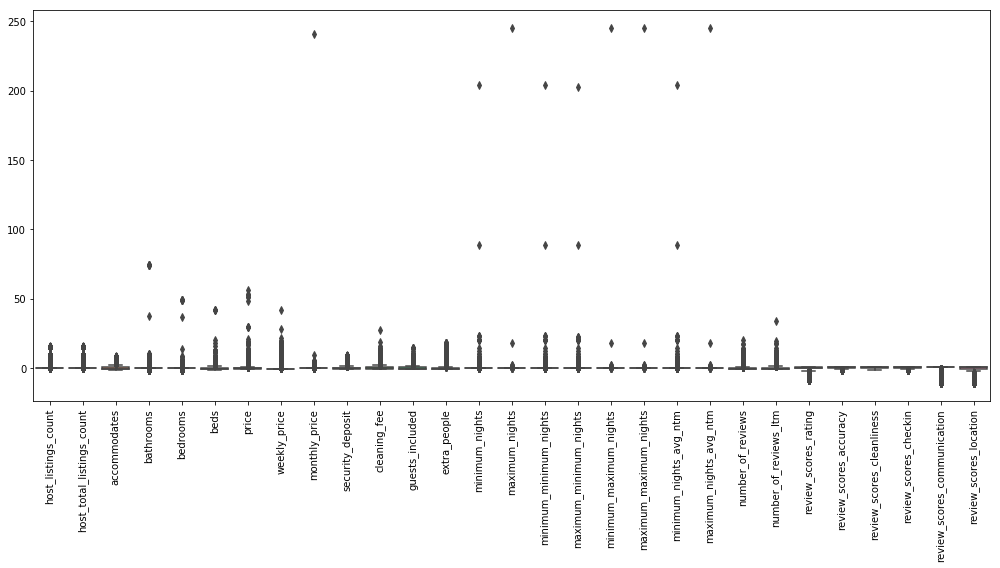

In [315]:
plt.figure(figsize=(14,8))
sns.boxplot( data = df1_features_scaled )
plt.xticks(rotation=90)  

plt.tight_layout()

#### From the boxplot we can see a huge number of data is far out from mean and these outliers can affect the result significantly. In order to achieve a better result, we should consider a dataset with more closer to mean.

(45704, 29)


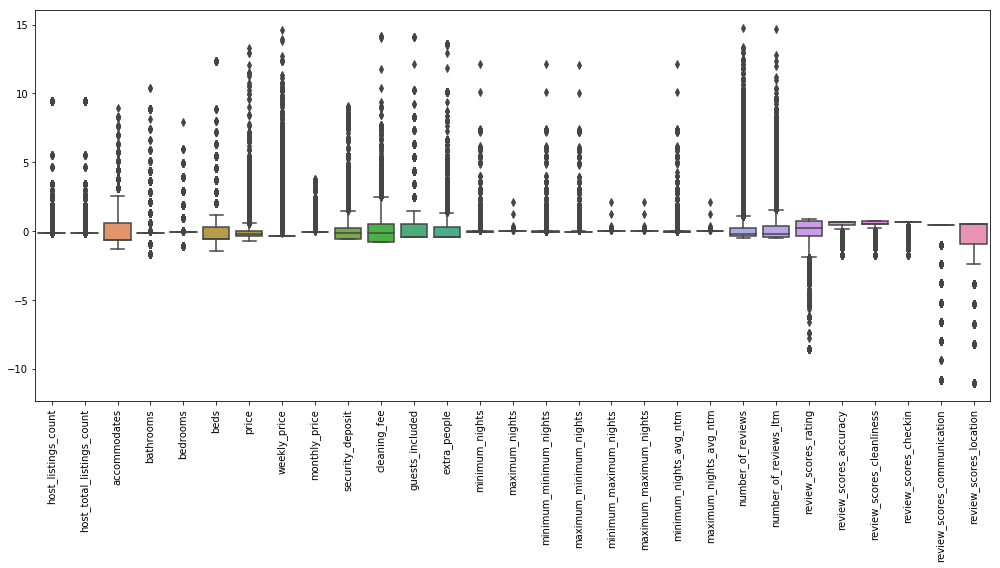

In [316]:
df1_features_clean2=df1_features_scaled[df1_features_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 1000).all(axis=1)]
print(df1_features_clean.shape)
plt.figure(figsize=(14,8))
sns.boxplot( data = df1_features_clean )
plt.xticks(rotation=90)  
plt.tight_layout()


In [319]:
#############################
df1_features_y_clean_2 = pd.concat([df1_features_clean, y], axis=1, join_axes=[df1_features_clean.index])
#################################
df1_features_clean1 = df1_features_y_clean_2.iloc[:,0:28]
#df_features_clean1 = df_features_clean1.reshape(df_features_clean1.shape[1:])
df1_y = df1_features_y_clean_2.iloc[:,28]


Dividing data into training and test set

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train1, X_test1, y_train1, y_test1 = train_test_split(df1_features_clean1, df1_y,test_size=0.2)

In [281]:
#X_test1.fillna(X_test1.mean())
#X_train1.fillna(X_train1.mean())
#y_test1.fillna(y_test1.mean())
#y_train1.fillna(y_train1.mean())

In [321]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

### Training the Algorithm
After scaling, it's time to train our random forest algorithm to solve this regression problem.

In [351]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train1, y_train1)
y_pred1 = regressor.predict(X_test1)





### Evaluating the algorithm
The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error.

In [352]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 0.6131397199816427
Mean Squared Error: 0.7408763825769504
Root Mean Squared Error: 0.8607417630026735


# Comparison between London and Paris dataset

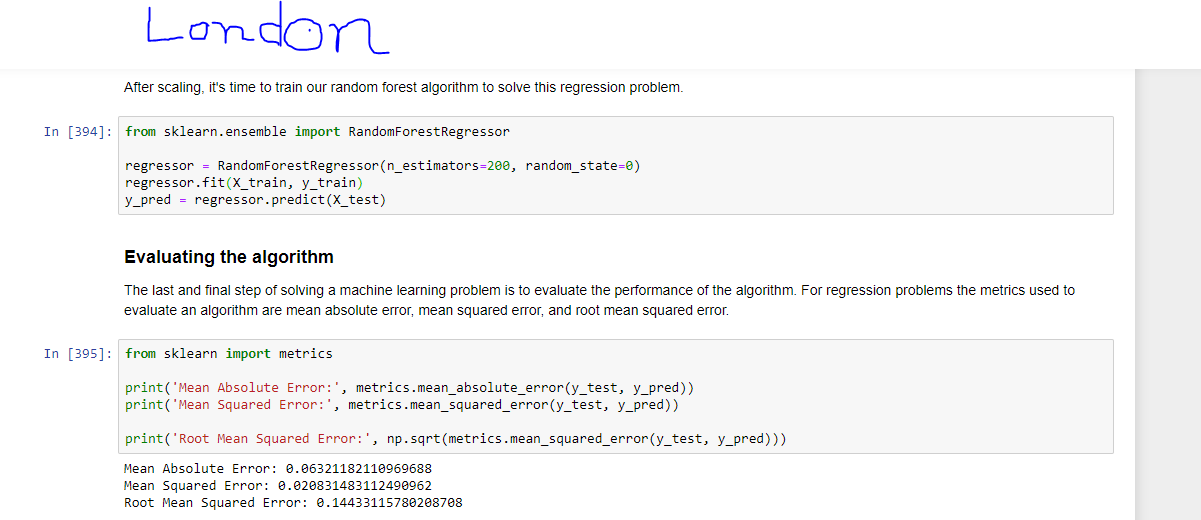 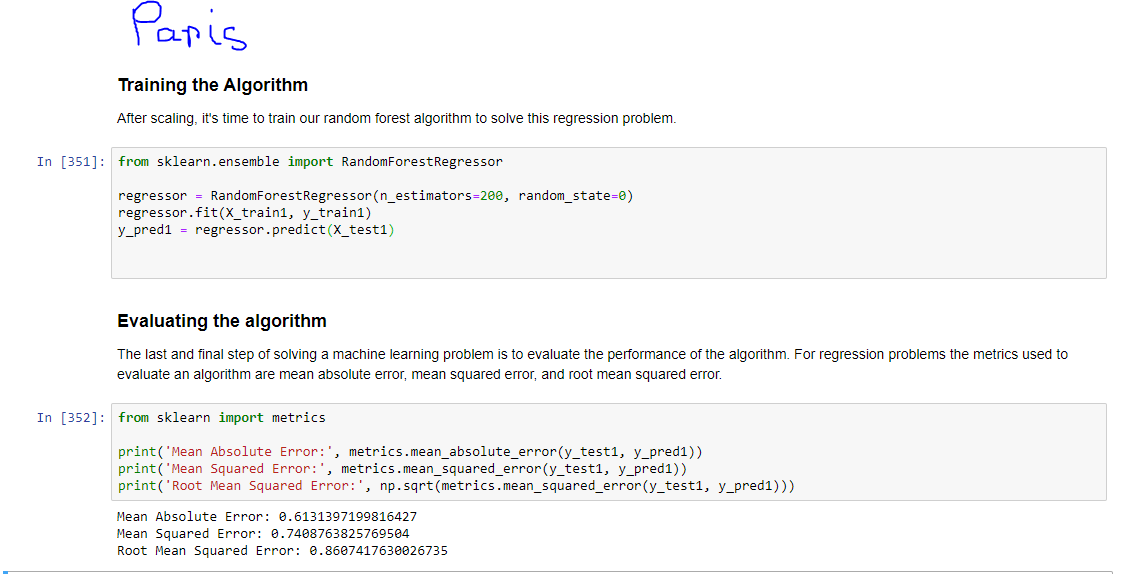 

### We can easily compare between above two regression result of London and Paris airbnb dataset. We have ran the regressor for 200 estimator and calculated the error counts. For London, the RMSE is very much lower to 14.43% and for Paris, the RMSE is 86.07% which is way higher than London. It also indicates why London has attracted more tourists than Paris and it is because of its stable pricing. There might have been many more reason but according to our test set it is more stable pricing.

### So we can sum up that, London is attracting more tourists because of its stable and competitive pricing. 


# Problem 3b: Inferential Statistics

## Hypothesis Testing

H0: Expense in London == Expense in Paris
H1: Expense in London != Expense in Paris

We are trying to test which city is more expensive

In [1]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
df = pd.read_csv("E:\Sheba XYZ\Comparative Market Analysis Dataset-20190801T120513Z-001\Comparative Market Analysis Dataset/Price_London.csv")
df[['price_london','price_paris']].describe()

ztest ,pval = stests.ztest(df['price_london'], x2=None, value=500)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [2]:
ztest ,pval1 = stests.ztest(df['price_london'], x2=df['price_paris'], value=0,alternative='two-sided')
print(float(pval1))
print(ztest)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    

0.021550067606970563
-2.298205995956217
reject null hypothesis


### As p-value is below 0.05 and confidence interval is above 95%, the model successfully reject the null hypothesis that means the price of airbnb paris is not equal to the price of airbnb london

Now we have to run another test in order to prove London is more expensive than Paris. In order to prove that we check the availability ratio of the listings from two datasets.


H0: London is much popular as it gets more review
H1: Paris is popular because its gets more review

In [3]:
import pandas as pd
from scipy import stats
df = pd.read_csv("E:\Sheba XYZ\Comparative Market Analysis Dataset-20190801T120513Z-001\Comparative Market Analysis Dataset/Reviews.csv")
df[['number_of_reviews_Paris','number_of_reviews_London']].describe()
ttest,pval = stats.ttest_rel(df['number_of_reviews_Paris'], df['number_of_reviews_London'])
print(pval)
print(ttest)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.3848508787357875
0.8697594714074426
accept null hypothesis


### The numbers indicates London is more expensive because people's willingness to rent there. As with popularity, the expense increases in every sector related to tourism.

# Problem 4: Machine Learning Problem Statement 

In this dataset, the housings are not categorized like Cottage, Villa, Apartment, 200 years old villa/castle. Though these are provided in a short description but categorization would help people and analyst to find a proper match. After that, we can also try to find a pattern between category and house rules to find out which category entitle which rules. It could help us understand the host about his desire, likings and also help us to recommend a better suited customer for them. It can enhance the customer experience.


Firstly we can categorize the types of housing by using any suitable classification model then try to find out some key word from house rules using nlp in order to try the matchup with categories.
